In [44]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.layers import LSTM
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf

In [22]:
ms = yf.download('MSFT',
            start="2012-01-01",
            end="2021-12-31",
            progress=False)
df = ms[["Adj Close", "Open", "Close", "High", "Low"]].round(3)
df.head(10)

,Adj Close,Open,Close,High,Low
Date,,,,,
2012-01-03,21.201,26.55,26.77,26.96,26.39
2012-01-04,21.699,26.82,27.40,27.47,26.78
2012-01-05,21.921,27.38,27.68,27.73,27.29
2012-01-06,22.262,27.53,28.11,28.19,27.53
2012-01-09,21.969,28.05,27.74,28.10,27.72
2012-01-10,22.048,27.93,27.84,28.15,27.75
2012-01-11,21.953,27.43,27.72,27.98,27.37
2012-01-12,22.175,27.87,28.00,28.02,27.65
2012-01-13,22.373,27.93,28.25,28.25,27.79


<Axes: xlabel='Date'>

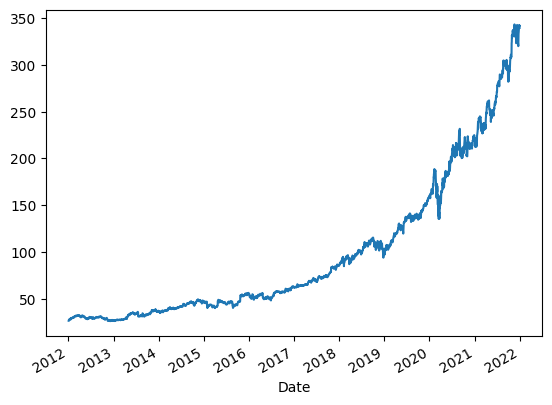

In [23]:
df.Close.plot()

In [24]:
df[:"2020"].Close.values.reshape(-1, 1).shape

(2265, 1)

In [25]:
df["2021":].Close.values.shape

(251,)

In [26]:
def ts_data(df, X_steps, y_steps):
  train_df = df[:"2020"].Close.values.reshape(-1, 1)
  test_df = df["2021":].Close.values.reshape(-1, 1)

  sc = MinMaxScaler(feature_range=(0, 1))
  train_df_scaled = sc.fit_transform(train_df)

  X_train = []
  y_train = []
  for i in range(X_steps, len(train_df_scaled)-y_steps+1):
    X_train.append(train_df_scaled[i-X_steps:i, 0])
    y_train.append(train_df_scaled[i:i+y_steps, 0])
  X_train = np.array(X_train)
  y_train = np.array(y_train)

  X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

  X = df.Close.values
  X = X[len(X)-len(test_df)-X_steps:]
  X = X.reshape(-1, 1)
  X = sc.transform(X)

  X_test = []
  y_test = []
  for i in range(X_steps, len(test_df)+X_steps-y_steps+1):
    X_test.append(X[i-X_steps:i, 0])
    y_test.append(X[i:i+y_steps, 0])

  X_test = np.array(X_test)
  X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
  y_test = np.array(y_test)

  return X_train, y_train, X_test, y_test, sc

In [27]:
df[:"2020"].Close.values.reshape(-1, 1).shape

(2265, 1)

In [28]:
X_train, y_train, X_test, y_test, sc = ts_data(df, 6, 2)

In [29]:
X_train.shape

(2258, 6, 1)

In [30]:
y_train.shape

(2258, 2)

In [31]:
X_test.shape

(250, 6, 1)

In [32]:
y_test.shape

(250, 2)

In [33]:
df.head(10)

,Adj Close,Open,Close,High,Low
Date,,,,,
2012-01-03,21.201,26.55,26.77,26.96,26.39
2012-01-04,21.699,26.82,27.40,27.47,26.78
2012-01-05,21.921,27.38,27.68,27.73,27.29
2012-01-06,22.262,27.53,28.11,28.19,27.53
2012-01-09,21.969,28.05,27.74,28.10,27.72
2012-01-10,22.048,27.93,27.84,28.15,27.75
2012-01-11,21.953,27.43,27.72,27.98,27.37
2012-01-12,22.175,27.87,28.00,28.02,27.65
2012-01-13,22.373,27.93,28.25,28.25,27.79


SimpleRNN-Model

In [34]:
simple_rnn_model = Sequential([
                               SimpleRNN(50, return_sequences=True),
                               SimpleRNN(50),
                               Dense(2)
                              ])

In [35]:
simple_rnn_model.compile(optimizer="adam", loss="mean_squared_error")

In [36]:
simple_rnn_model.fit(X_train, y_train, epochs=100, validation_split=0.15)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0258 - val_loss: 0.0358
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2606e-04 - val_loss: 0.0212
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6813e-04 - val_loss: 0.0159
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2668e-04 - val_loss: 0.0096
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1173e-04 - val_loss: 0.0081
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.5553e-05 - val_loss: 0.0079
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.2783e-05 - val_loss: 0.0055
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3767e-04 - val_loss: 0.0044
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7096e-05 - val_loss: 0.0037
Epoch 10/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4824e-05 - val_loss: 0.0042
Epoch 11/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9544e-05 - val_loss: 0.0029
Epoch 12/100
60/60 ━━━━

In [39]:
simple_rnn_pred = simple_rnn_model.predict(X_test)
simple_rnn_pred.shape

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


(250, 2)

In [40]:
def prediction_plot(predictions):
  fig, ax = plt.subplots()
  ax.plot(df["2021":].index[:len(y_test)],
          sc.inverse_transform(y_test[:, 0].reshape(-1, 1)), label="Real")
  ax.plot(df["2021":].index[:len(y_test)],
          sc.inverse_transform(predictions[:, 0].reshape(-1, 1)), label="Prediction")

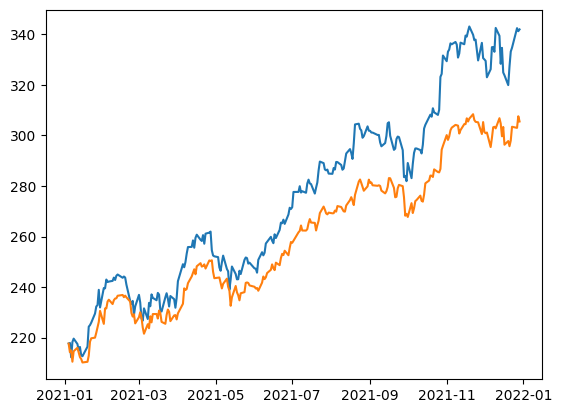

In [41]:
prediction_plot(simple_rnn_pred)

LSTM

In [45]:
lstm = Sequential([
                    LSTM(50, return_sequences=True),
                    LSTM(50),
                    Dense(2)
                  ])

In [46]:
lstm.compile(optimizer="adam", loss="mean_squared_error")

In [47]:
lstm.fit(X_train, y_train, epochs=100, validation_split=0.15)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0147 - val_loss: 0.0109
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3827e-04 - val_loss: 0.0034
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.7981e-05 - val_loss: 0.0014
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.9863e-05 - val_loss: 9.4156e-04
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.7742e-05 - val_loss: 0.0011
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.6390e-05 - val_loss: 0.0012
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.3047e-05 - val_loss: 0.0016
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.8188e-05 - val_loss: 0.0014
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.0496e-05 - val_loss: 0.0020
Epoch 10/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.6694e-05 - val_loss: 0.0014
Epoch 11/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.7803e-05 - val_loss: 0.0015
Epoch 12/100
60/60 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


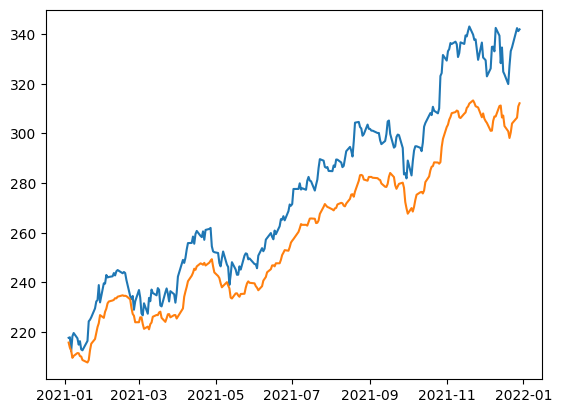

In [48]:
prediction_plot(lstm.predict(X_test))